In [162]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,minmax_scale
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb
from sklearn.ensemble import StackingClassifier




In [163]:
  !gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 14.3MB/s]


In [164]:
!ls

encoded_data.csv  ola_driver_scaler.csv  sample_data  xgmodel.pkl


In [165]:
df=pd.read_csv("ola_driver_scaler.csv")

In [166]:
df.head(15)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [167]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [168]:
df.shape

(19104, 14)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [170]:
df.drop(columns=['Unnamed: 0'],inplace=True)

Unnamed: 0 columns, no information is provided by this column just an index.

In [171]:
df.isna().sum()

,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [172]:

df['Age'].value_counts(normalize=True, dropna=False).sort_values(ascending=False) * 100


,proportion
Age,
36.0,6.715871
33.0,6.543132
34.0,6.459380
30.0,5.998744
32.0,5.983040
35.0,5.956868
31.0,5.632328
29.0,5.302554
37.0,4.512144


In [173]:

df['Gender'].value_counts(normalize=True, dropna=False).sort_values(ascending=False) * 100


,proportion
Gender,
0.0,57.966918
1.0,41.760888
NaN,0.272194


In [174]:

df['LastWorkingDate'].value_counts(normalize=True, dropna=False).sort_values(ascending=False) * 100


,proportion
LastWorkingDate,
NaN,91.541039
29/07/20,0.366415
22/09/19,0.136097
17/03/19,0.073283
28/11/20,0.068049
...,...
11/12/19,0.005235
08/11/19,0.005235
18/06/19,0.005235


there is not need to fill missing value for this feature Lastworkingdate as it give us information regarding is the driver churn or not .

In [175]:
df.dtypes

,0
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object
Joining Designation,int64


LastWorkingDate, (MMM-YY) and DateOfJoining have very little importance in computing NaN values. Driver ID is just a unique number, so these features will unnecessarily give false value to the NaN values we are going to compute. Therefore, we will simply drop these columns.

In [176]:
df_num=df.select_dtypes(include='number')

In [177]:
df_num.drop(columns=['Driver_ID'],inplace=True)

In [178]:
df_num

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2,57387,1,1,2381060,2
1,28.0,0.0,2,57387,1,1,-665480,2
2,28.0,0.0,2,57387,1,1,0,2
3,31.0,0.0,2,67016,2,2,0,1
4,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2,70254,2,2,740280,3
19100,30.0,0.0,2,70254,2,2,448370,3
19101,30.0,0.0,2,70254,2,2,0,2
19102,30.0,0.0,2,70254,2,2,200420,2


In [179]:
imputer=KNNImputer(n_neighbors=5)

In [180]:
data=imputer.fit_transform(df_num)

In [181]:
df1=pd.DataFrame(data,columns=df_num.columns)

In [182]:
df1.isna().sum()

,0
Age,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
Grade,0
Total Business Value,0
Quarterly Rating,0


In [183]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [184]:
df1.columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [185]:
df1['Driver_Id']=df['Driver_ID']

In [186]:
df1['MMM-YY']=df['MMM-YY']

In [187]:
df1['Dateofjoining']=df['Dateofjoining']

In [188]:
df1['LastWorkingDate']=df['LastWorkingDate']

In [189]:
df1['LastWorkingDate']=df['LastWorkingDate']

In [190]:
df1['City']=df['City']

In [191]:
df1.columns

Index(['Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating', 'Driver_Id',
       'MMM-YY', 'Dateofjoining', 'LastWorkingDate', 'City'],
      dtype='object')

In [192]:
df1

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Driver_Id,MMM-YY,Dateofjoining,LastWorkingDate,City
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1,01/01/19,24/12/18,NaN,C23
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,1,02/01/19,24/12/18,NaN,C23
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,1,03/01/19,24/12/18,03/11/19,C23
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,11/01/20,11/06/20,NaN,C7
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,12/01/20,11/06/20,NaN,C7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2788,08/01/20,06/08/20,NaN,C27
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2788,09/01/20,06/08/20,NaN,C27
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2788,10/01/20,06/08/20,NaN,C27
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2788,11/01/20,06/08/20,NaN,C27


we have multipule data entry for driver_id so we will do aggregation in such a manner that 1 unique id has only 1 row in the data.

In [193]:
df1

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Driver_Id,MMM-YY,Dateofjoining,LastWorkingDate,City
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1,01/01/19,24/12/18,NaN,C23
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,1,02/01/19,24/12/18,NaN,C23
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,1,03/01/19,24/12/18,03/11/19,C23
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,11/01/20,11/06/20,NaN,C7
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,12/01/20,11/06/20,NaN,C7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2788,08/01/20,06/08/20,NaN,C27
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2788,09/01/20,06/08/20,NaN,C27
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2788,10/01/20,06/08/20,NaN,C27
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2788,11/01/20,06/08/20,NaN,C27


let's add a new feature quarterly rating to check if the rating increase or decrease

In [194]:
qr1=df1.groupby('Driver_Id').agg({'Quarterly Rating':'first'})

In [195]:
qr2=df1.groupby('Driver_Id').agg({'Quarterly Rating':'last'})

In [196]:
qr1

,Quarterly Rating
Driver_Id,
1,2.0
2,1.0
4,1.0
5,1.0
6,1.0
...,...
2784,3.0
2785,1.0
2786,2.0


In [197]:
qr2

,Quarterly Rating
Driver_Id,
1,2.0
2,1.0
4,1.0
5,1.0
6,2.0
...,...
2784,4.0
2785,1.0
2786,1.0


In [198]:
qr = (qr2['Quarterly Rating']>qr1['Quarterly Rating']).reset_index()
empid = qr[qr['Quarterly Rating']==True]['Driver_Id']

qri = []
for i in df1['Driver_Id']:
    if i in empid.values:  # changed -- instead of empid--> empid.values
        qri.append(1)
    else:
        qri.append(0)

df1['Quarterly_Rating_Increased'] = qri

In [199]:
df1

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Driver_Id,MMM-YY,Dateofjoining,LastWorkingDate,City,Quarterly_Rating_Increased
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1,01/01/19,24/12/18,NaN,C23,0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,1,02/01/19,24/12/18,NaN,C23,0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,1,03/01/19,24/12/18,03/11/19,C23,0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,11/01/20,11/06/20,NaN,C7,0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2,12/01/20,11/06/20,NaN,C7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,2788,08/01/20,06/08/20,NaN,C27,1
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,2788,09/01/20,06/08/20,NaN,C27,1
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,2788,10/01/20,06/08/20,NaN,C27,1
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,2788,11/01/20,06/08/20,NaN,C27,1


In [200]:
first_sal=df1.groupby("Driver_Id").agg({'Income':'first'})
last_sal=df1.groupby("Driver_Id").agg({'Income':'last'})
s = (last_sal['Income']>first_sal['Income']).reset_index()
empid = s[s['Income']==True]['Driver_Id']

si = []
for i in df1['Driver_Id']:
    if i in empid.values:
        si.append(1)
    else:
        si.append(0)

df1['Income_Increased'] = si



In [201]:
agg_fun = {'Age':'max', 'Gender':'first','City':'first',
                 'Education_Level':'last', 'Income':'last',
                 'Joining Designation':'last','Grade':'last',
                 'Dateofjoining':'last','LastWorkingDate':'last',
                 'Total Business Value':'sum','Quarterly Rating':'last','Quarterly_Rating_Increased':'last','Income_Increased':'first'}

In [202]:
df_combine=df1.groupby(['Driver_Id']).aggregate(agg_fun)


In [203]:
df_combine

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased
Driver_Id,,,,,,,,,,,,,
1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,24/12/18,03/11/19,1715580.0,2.0,0,0
2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,11/06/20,None,0.0,1.0,0,0
4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,12/07/19,27/04/20,350000.0,1.0,0,0
5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,01/09/19,03/07/19,120360.0,1.0,0,0
6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,31/07/20,None,1265000.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,15/10/15,None,21748820.0,4.0,1,0
2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,28/08/20,28/10/20,0.0,1.0,0,0
2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,31/07/18,22/09/19,2815090.0,1.0,0,0


there is not target variable like is the person still work in the company or not, we will drive it from another feature i.e lastworkingdate if last working date is there means left else working.

In [204]:
def lastday(x):
    if pd.isna(x):
        return 0  #not churn
    else:
        return 1 #churn

In [205]:
df_combine['churn']=df_combine['LastWorkingDate'].apply(lastday)

In [206]:
df_combine

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn
Driver_Id,,,,,,,,,,,,,,
1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,24/12/18,03/11/19,1715580.0,2.0,0,0,1
2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,11/06/20,None,0.0,1.0,0,0,0
4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,12/07/19,27/04/20,350000.0,1.0,0,0,1
5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,01/09/19,03/07/19,120360.0,1.0,0,0,1
6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,31/07/20,None,1265000.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,15/10/15,None,21748820.0,4.0,1,0,0
2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,28/08/20,28/10/20,0.0,1.0,0,0,1
2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,31/07/18,22/09/19,2815090.0,1.0,0,0,1


In [207]:
df_combine['churn'].value_counts()

,count
churn,
1,1616
0,765


1616 has churn the ola and rest 765 driver still working.

In [208]:
df=df_combine

let's check for outlier in each columns

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2381 entries, 1 to 2788
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         2381 non-null   float64
 1   Gender                      2381 non-null   float64
 2   City                        2381 non-null   object 
 3   Education_Level             2381 non-null   float64
 4   Income                      2381 non-null   float64
 5   Joining Designation         2381 non-null   float64
 6   Grade                       2381 non-null   float64
 7   Dateofjoining               2381 non-null   object 
 8   LastWorkingDate             1616 non-null   object 
 9   Total Business Value        2381 non-null   float64
 10  Quarterly Rating            2381 non-null   float64
 11  Quarterly_Rating_Increased  2381 non-null   int64  
 12  Income_Increased            2381 non-null   int64  
 13  churn                       2381 non-n

let change datatype of dateofjoining, lastworkingdate to datetime format.

In [210]:
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

<ipython-input-210-778ae0080d5c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
<ipython-input-210-778ae0080d5c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])


In [211]:
df.dtypes

,0
Age,float64
Gender,float64
City,object
Education_Level,float64
Income,float64
Joining Designation,float64
Grade,float64
Dateofjoining,datetime64[ns]
LastWorkingDate,datetime64[ns]
Total Business Value,float64


In [212]:
df

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn
Driver_Id,,,,,,,,,,,,,,
1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,0,0,1
2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0,0,0
4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0,0,1
5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0,0,1
6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,1,0,0
2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0,0,1
2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,0,0,1


In [213]:
df['Dateofjoiningyear']=df['Dateofjoining'].dt.year
df['Dateofjoiningmonth'] = df['Dateofjoining'].dt.month

In [214]:
df

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth
Driver_Id,,,,,,,,,,,,,,,,
1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,0,0,1,2018,12
2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0,0,0,2020,11
4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0,0,1,2019,12
5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0,0,1,2019,1
6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,1,0,0,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,1,0,0,2015,10
2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0,0,1,2020,8
2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,0,0,1,2018,7


<Axes: >

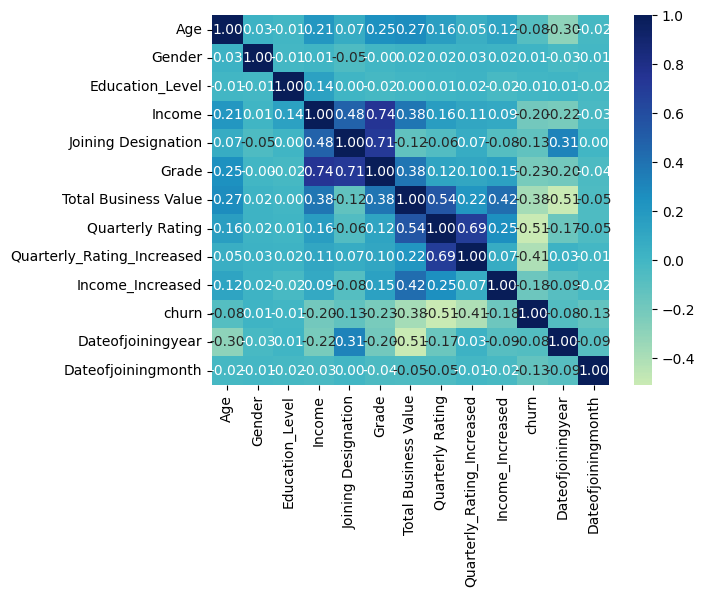

In [215]:


sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='YlGnBu', center=0)

In [216]:
df.describe()

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2381,1616,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,33.770181,0.411172,1.00756,59334.157077,1.820244,2.096598,2019-02-08 07:14:50.550189056,2019-12-21 20:59:06.534653440,4.586742e+06,1.427971,0.150357,0.018060,0.678706,2018.536329,7.357413
min,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,-1.385530e+06,1.000000,0.000000,0.000000,0.000000,2013.000000,1.000000
25%,30.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,2018-06-29 00:00:00,2019-06-06 00:00:00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,2018.000000,5.000000
50%,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,2019-07-21 00:00:00,2019-12-20 12:00:00,8.176800e+05,1.000000,0.000000,0.000000,1.000000,2019.000000,7.000000
75%,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,2020-05-02 00:00:00,2020-07-03 00:00:00,4.173650e+06,2.000000,0.000000,0.000000,1.000000,2020.000000,10.000000
max,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,9.533106e+07,4.000000,1.000000,1.000000,1.000000,2020.000000,12.000000
std,5.933265,0.491740,0.81629,28383.666384,0.841433,0.941522,NaN,NaN,9.127115e+06,0.809839,0.357496,0.133195,0.467071,1.609597,3.143143


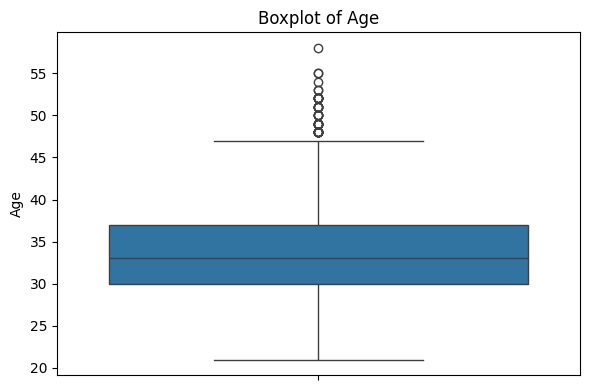

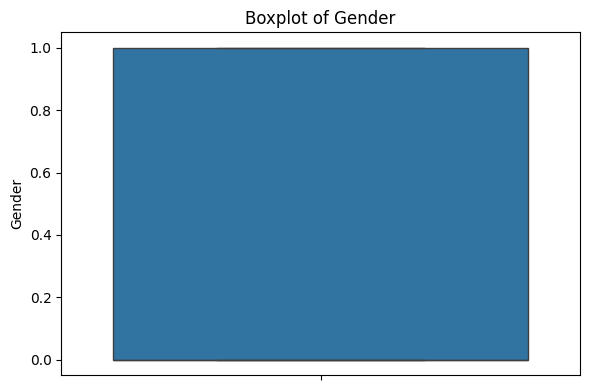

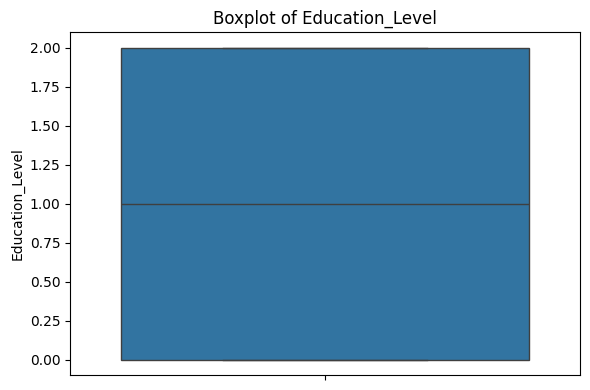

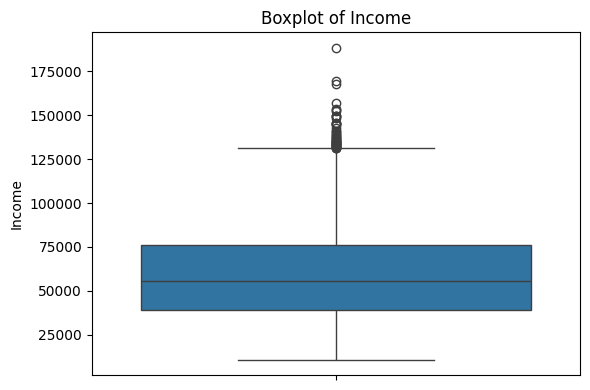

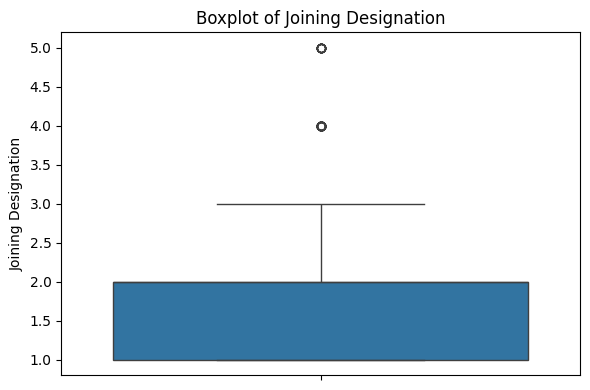

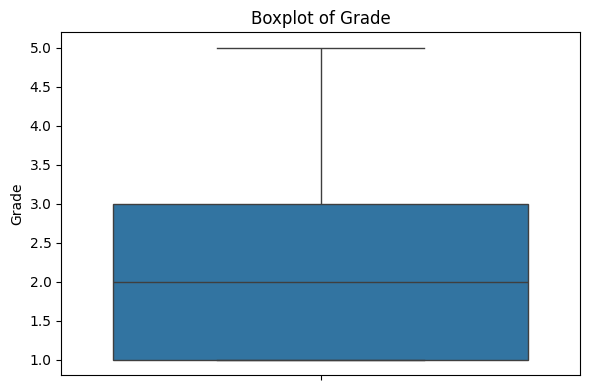

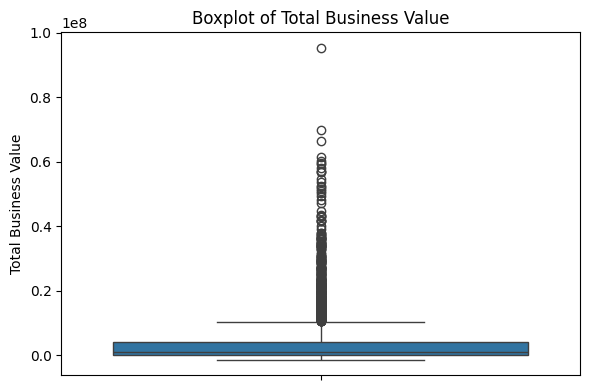

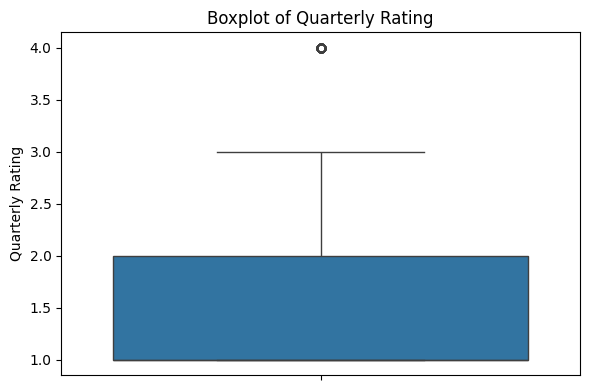

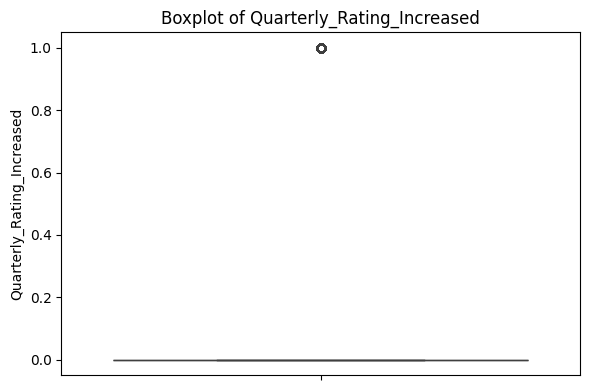

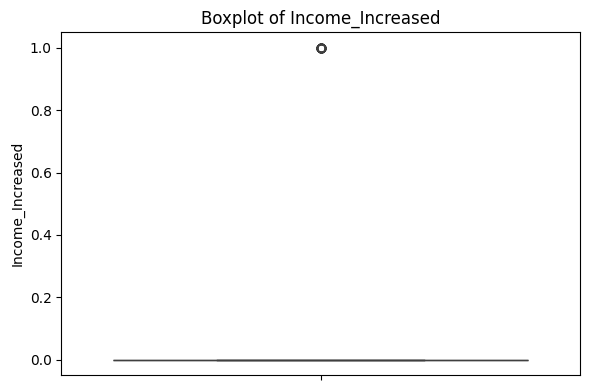

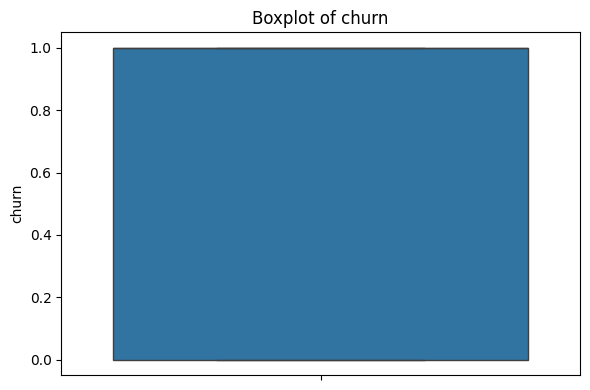

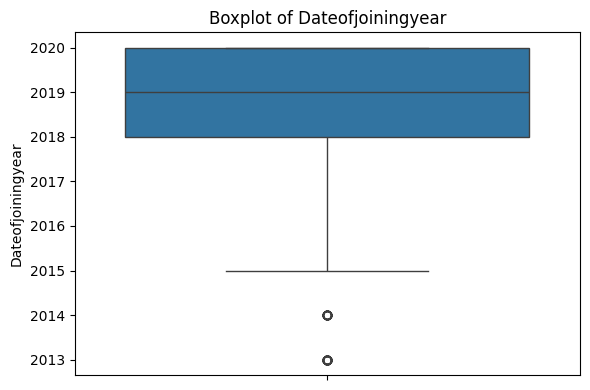

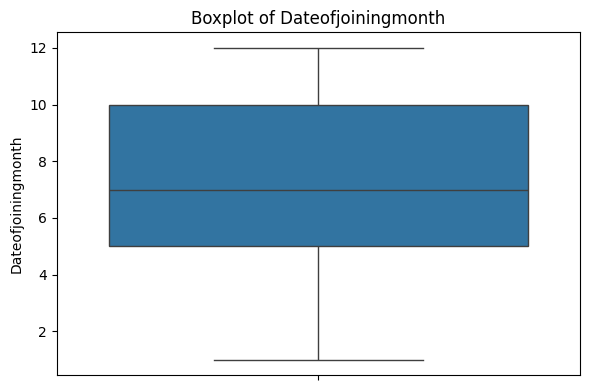

In [217]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns



for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


lets deep dive into each of them one by one

In [218]:
df

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth
Driver_Id,,,,,,,,,,,,,,,,
1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,0,0,1,2018,12
2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0,0,0,2020,11
4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0,0,1,2019,12
5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0,0,1,2019,1
6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,1,0,0,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,1,0,0,2015,10
2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0,0,1,2020,8
2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,0,0,1,2018,7


In [219]:
df['churn'].value_counts(normalize=True)*100

,proportion
churn,
1,67.870643
0,32.129357


around 68% of the driver left the ola rest 32% stays.

In [220]:
df['Age'].value_counts()

,count
Age,
34.0,166
32.0,165
31.0,164
30.0,153
33.0,145
...,...
36.2,1
31.2,1
58.0,1


<Axes: xlabel='Age', ylabel='Count'>

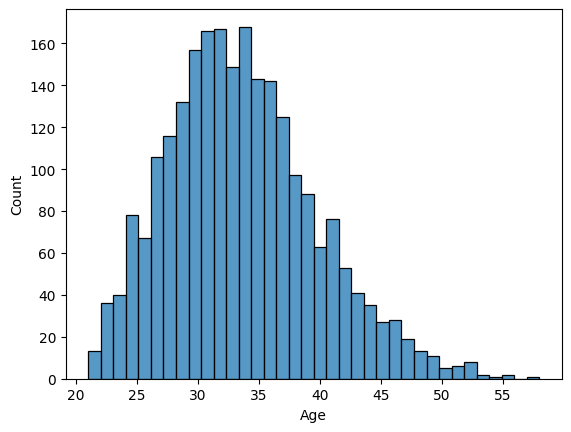

In [221]:
sns.histplot(x=df['Age'])

In [222]:
df.groupby('churn')['Age'].value_counts()

churn  Age 
0      30.0    55
       35.0    55
       37.0    54
       36.0    53
       34.0    52
               ..
1      36.6     1
       39.2     1
       39.4     1
       53.0     1
       58.0     1
Name: count, Length: 95, dtype: int64

In [223]:
df['Gender'].value_counts()

,count
Gender,
0.0,1400
1.0,976
0.6,2
0.8,2
0.2,1


lets add >.5 to female and less than it to male

In [224]:
def mal_fem(x):
  if x>0.5:
    return 1
  else:
    return 0

In [225]:
df['Gender']=df['Gender'].apply(mal_fem)

In [226]:
df.groupby('Gender')['churn'].value_counts(normalize=True)*100

Gender  churn
0       1        67.451820
        0        32.548180
1       1        68.469388
        0        31.530612
Name: proportion, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

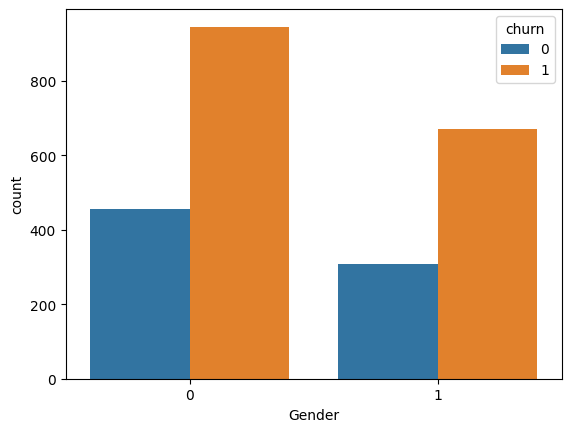

In [227]:
sns.countplot(x=df['Gender'],hue=df['churn'])

Around 68 % of the individual m,f left the ola

In [228]:
df.groupby('Education_Level')['churn'].value_counts(normalize=True)*100

Education_Level  churn
0.0              1        69.132653
                 0        30.867347
1.0              1        66.289308
                 0        33.710692
2.0              1        68.204489
                 0        31.795511
Name: proportion, dtype: float64

<Axes: xlabel='Education_Level', ylabel='count'>

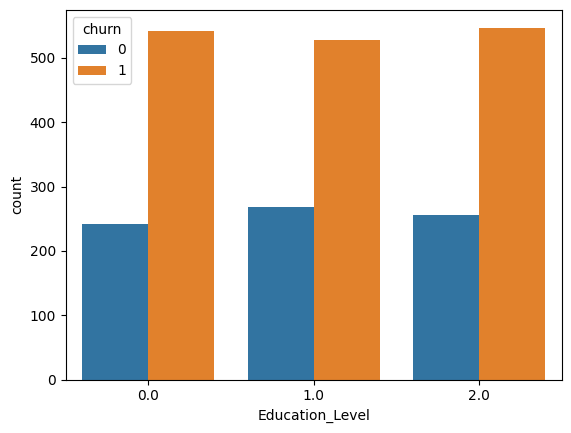

In [229]:
sns.countplot(x=df['Education_Level'],hue=df['churn'])

Across all education levels (0, 1, and 2), the proportion of churned employees remains fairly consistent—around 66% to 69%.
This indicates that education level does not have a strong influence on churn behavior, and its predictive power for the churn target is likely low.

In [230]:
df.groupby('City')['churn'].value_counts(normalize=True)*100

City  churn
C1    1        70.000000
      0        30.000000
C10   1        70.930233
      0        29.069767
C11   1        70.312500
      0        29.687500
C12   1        65.432099
      0        34.567901
C13   1        81.690141
      0        18.309859
C14   1        73.417722
      0        26.582278
C15   1        68.316832
      0        31.683168
C16   1        59.523810
      0        40.476190
C17   1        77.464789
      0        22.535211
C18   1        63.768116
      0        36.231884
C19   1        56.944444
      0        43.055556
C2    1        76.388889
      0        23.611111
C20   1        73.026316
      0        26.973684
C21   1        60.759494
      0        39.240506
C22   1        60.975610
      0        39.024390
C23   1        77.027027
      0        22.972973
C24   1        69.863014
      0        30.136986
C25   1        72.972973
      0        27.027027
C26   1        69.892473
      0        30.107527
C27   1        67.415730
      0        32.584270
C28   1        71.951220
      0        28.048780
C29   1        53.125000
      0        46.875000
C3    1        63.414634
      0        36.585366
C4    1        67.532468
      0        32.467532
C5    1        60.000000
      0        40.000000
C6    1        70.512821
      0        29.487179
C7    1        68.421053
      0        31.578947
C8    1        59.550562
      0        40.449438
C9    1        70.666667
      0        29.333333
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='City'>

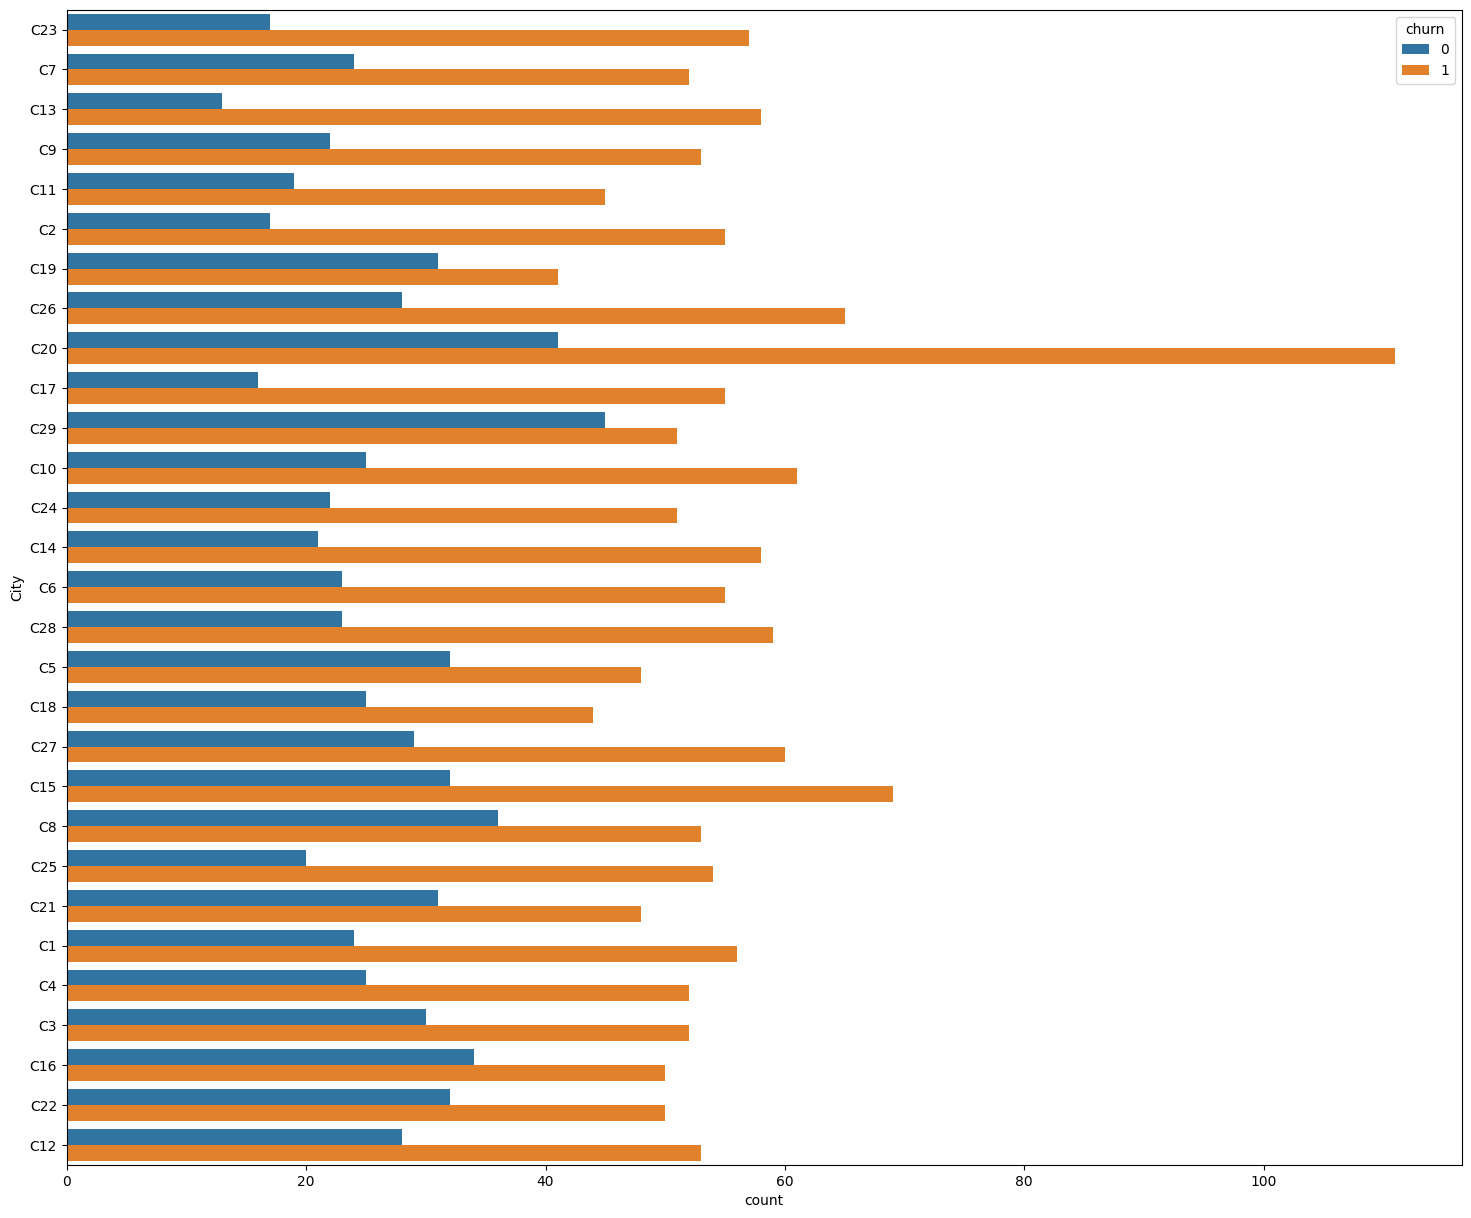

In [231]:
plt.figure(figsize=(18,15))
sns.countplot(data=df,y='City',hue='churn')

High Churn Cities:

C13 (81.69%), C17 (77.46%), C23 (77.03%), and C2 (76.39%) show the highest churn rates, indicating a serious retention issue.

Low Churn Cities:

C29 (53.13%), C19 (56.94%), C8 (59.55%), and C16 (59.52%) have comparatively lower churn, suggesting better customer retention.

Most Cities Have High Churn (>60%):

The majority of cities listed show churn rates above 60%, implying a systemic churn issue.

Consistent Pattern:

Churn is fairly consistent across most cities, clustering around 65%–75%.

In [232]:
df

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth
Driver_Id,,,,,,,,,,,,,,,,
1,28.0,0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,0,0,1,2018,12
2,31.0,0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0,0,0,2020,11
4,43.0,0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0,0,1,2019,12
5,29.0,0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0,0,1,2019,1
6,31.0,1,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,1,0,0,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,1,0,0,2015,10
2785,34.0,1,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0,0,1,2020,8
2786,45.0,0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,0,0,1,2018,7


<Axes: xlabel='Income', ylabel='Density'>

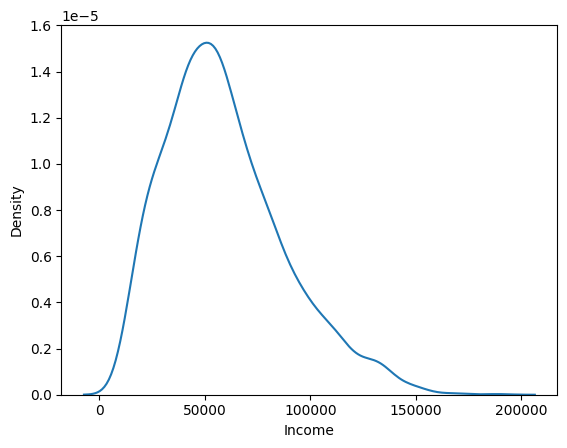

In [233]:
sns.kdeplot(x=df['Income'])

The income distribution is right-skewed.

The peak (mode) occurs around ₹50,000, indicating that most customers fall in this income range.

A long tail exists toward higher income brackets (up to ₹200,000), but very few customers lie there.

This suggests that the majority of customers have relatively modest incomes.

<Axes: xlabel='Total Business Value', ylabel='Density'>

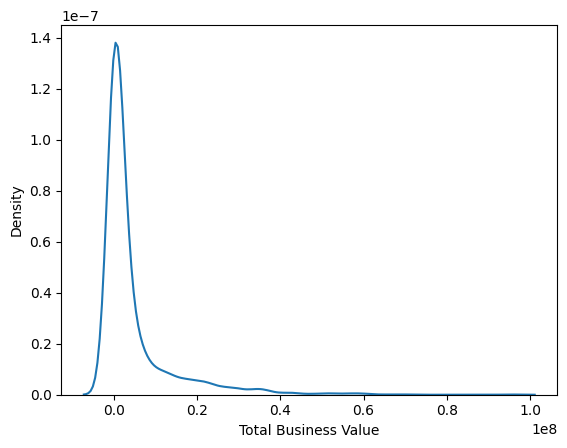

In [234]:
sns.kdeplot(x=df['Total Business Value'])


<Axes: xlabel='Income', ylabel='Total Business Value'>

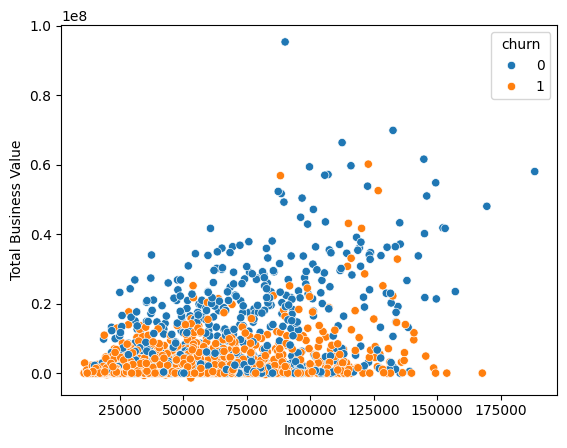

In [235]:
sns.scatterplot(x=df['Income'],y=df['Total Business Value'],hue=df['churn'])

Blue dots (churn = 0): These customers did not churn. They are more densely distributed across a wide range of incomes and business values, especially at higher income and business value levels.

Orange dots (churn = 1): These customers did churn. They tend to cluster in the lower income and business value ranges.

Observation:

Customers with higher income and higher business value are less likely to churn.

Churn is more frequent among lower-income customers, who also contribute less business value.



In [236]:
df.groupby(['churn'])['Income'].mean()

,Income
churn,
0,67662.90719
1,55391.40099


In [237]:
df.groupby(['churn'])['Total Business Value'].mean()

,Total Business Value
churn,
0,9.620626e+06
1,2.203746e+06


Non-churned (churn = 0): ₹67,662.91

Churned (churn = 1): ₹55,391.40
Customers who stayed have, on average, ₹12,271.51 higher income.

Total Business Value:
Non-churned (churn = 0): ₹9.62 million

Churned (churn = 1): ₹2.20 million
Customers who stayed contribute over 4.37x more business value on average.



In [238]:
df.groupby('churn')['Grade'].value_counts(normalize=True)*100

churn  Grade
0      3.0      37.385621
       2.0      33.333333
       1.0      18.954248
       4.0       8.888889
       5.0       1.437908
1      2.0      37.128713
       1.0      36.881188
       3.0      20.853960
       4.0       4.331683
       5.0       0.804455
Name: proportion, dtype: float64

<Axes: xlabel='Grade', ylabel='count'>

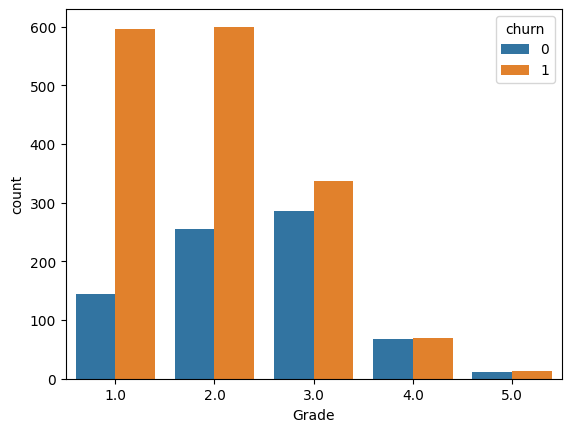

In [239]:
sns.countplot(x=df['Grade'],hue=df['churn'])

Grades 1 and 2 dominate churned customers:

~74% of churned customers are from Grades 1 and 2.

Indicates lower-grade customers are at highest churn risk.

Grades 3 to 5 see more non-churners:

Grade 3 has the highest share (37.4%) among non-churned.

Higher grades are strongly associated with customer retention.

Grade 5 has the lowest churn and non-churn, possibly due to a small population in that segment, but still shows better retention.

In [240]:
df.groupby('churn')['Joining Designation'].value_counts(normalize=True)*100


churn  Joining Designation
0      1.0                    35.816993
       2.0                    33.333333
       3.0                    28.627451
       4.0                     1.830065
       5.0                     0.392157
1      1.0                    46.534653
       2.0                    34.653465
       3.0                    16.955446
       4.0                     1.361386
       5.0                     0.495050
Name: proportion, dtype: float64

<Axes: xlabel='Joining Designation', ylabel='count'>

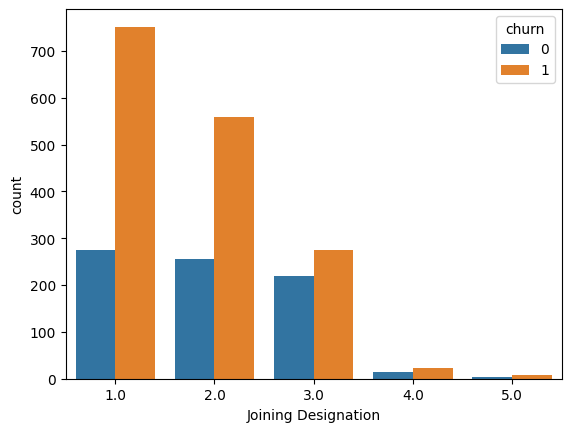

In [241]:
sns.countplot(x=df['Joining Designation'],hue=df['churn'])

Churn is highest among customers who joined at lower designations (1 & 2):

Over 81% of churned customers started at designation 1 or 2.

These roles may offer less engagement, lower pay, or fewer growth opportunities, increasing churn risk.

Non-churned customers are more evenly spread across designations 1–3:

Designation 3 accounts for 28.6% of retained customers, compared to only ~17% of churned ones.

Designations 4 and 5 are rare, but show low churn in both groups.



In [242]:
df.groupby('churn')['Quarterly_Rating_Increased'].value_counts(normalize=True)*100


churn  Quarterly_Rating_Increased
0      0                             63.921569
       1                             36.078431
1      0                             94.925743
       1                              5.074257
Name: proportion, dtype: float64

<Axes: xlabel='Quarterly_Rating_Increased', ylabel='count'>

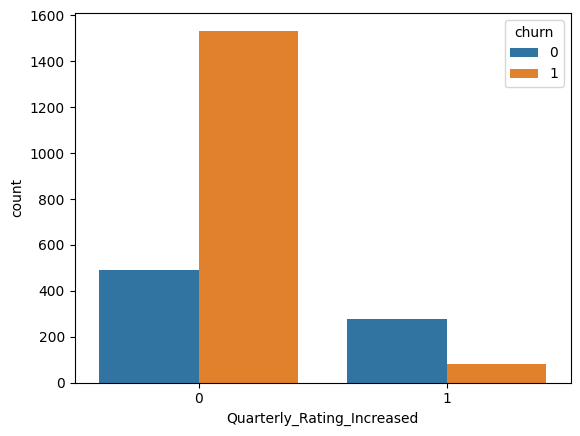

In [243]:
sns.countplot(x=df['Quarterly_Rating_Increased'],hue=df['churn'])

churn = 1 (Churned Employees):
94.9% of churned employees did not receive a quarterly rating increase.

Only 5.1% had a rating increase.

Churn = 0 (Retained Employees):
63.9% did not receive a rating increase.

36.1% received a rating increase.

In [244]:
df.groupby('churn')['Dateofjoiningyear'].value_counts(normalize=True)*100


churn  Dateofjoiningyear
0      2020                 57.516340
       2019                 13.333333
       2018                  9.150327
       2015                  7.189542
       2016                  5.359477
       2014                  2.745098
       2017                  2.614379
       2013                  2.091503
1      2018                 32.735149
       2019                 30.259901
       2020                 23.391089
       2016                  4.146040
       2017                  4.084158
       2015                  3.341584
       2013                  1.547030
       2014                  0.495050
Name: proportion, dtype: float64

<Axes: xlabel='Dateofjoiningyear', ylabel='count'>

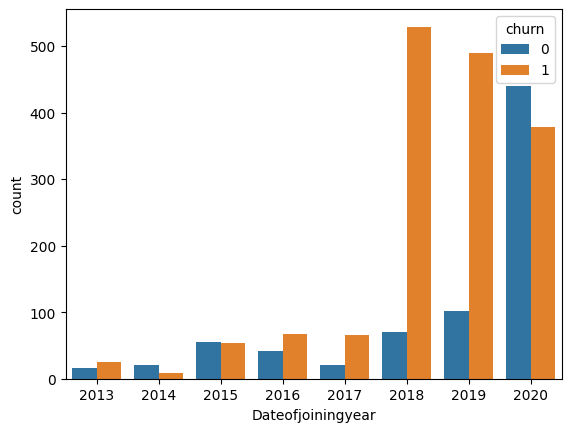

In [245]:
sns.countplot(x=df['Dateofjoiningyear'],hue=df['churn'])

Employees who joined recently (especially 2020):
Most likely to stay:

57.5% of retained (non-churned) employees joined in 2020.
High churn among 2018–2019 joiners




In [246]:
df.groupby('churn')['Dateofjoiningmonth'].value_counts(normalize=True)*100

churn  Dateofjoiningmonth
0      7                     13.594771
       11                    13.071895
       9                     11.895425
       12                    11.503268
       10                    11.372549
       8                      9.934641
       5                      9.019608
       6                      7.450980
       4                      4.444444
       1                      4.183007
       2                      2.352941
       3                      1.176471
1      5                     12.809406
       7                     11.881188
       10                    11.262376
       6                     10.705446
       11                     9.467822
       8                      9.158416
       1                      8.168317
       9                      8.106436
       12                     7.549505
       4                      4.331683
       2                      3.589109
       3                      2.970297
Name: proportion, dtype: float64

<Axes: xlabel='Dateofjoiningmonth', ylabel='count'>

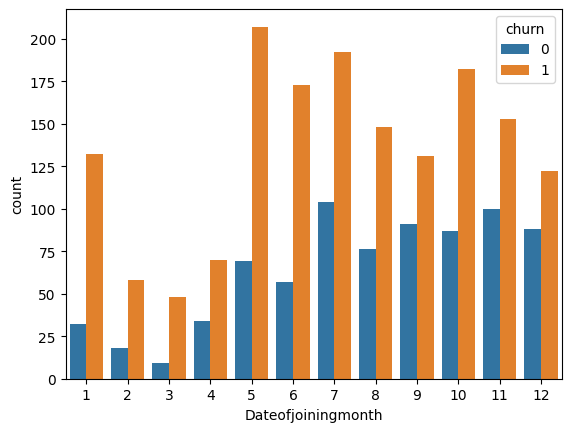

In [247]:
sns.countplot(x=df['Dateofjoiningmonth'],hue=df['churn'])

Highest Retention Month:

July (Month 7) has the highest number of people who did not churn, followed by November (11) and September (9).

Lowest Retention Month:

March (3) and February (2) have the lowest number of people who stayed (churn == 0).

General Trend:

More employees who joined in the second half of the year (July to December) tended to stay longer.

The first few months (especially January to April) show lower retention.

Top Months by Proportion of Stayers (churn == 0):

July (13.59%)

November (13.07%)

September (11.90%)

December (11.50%)

October (11.37%)


Highest Churn Month:

May (Month 5) has the highest churn rate, followed by June (6) and July (7).

General Pattern:

People who joined in May, June, July, and August were more likely to leave.

Top Months by Proportion of Leavers (churn == 1):

May (12.81%)

July (11.88%)

October (11.26%)

June (10.71%)

November (9.47%)
Retention seems stronger for those who joined in the latter half of the year (especially July–December).

May is a critical month for churn — both in absolute and proportional terms.

There is a clear seasonality: joining in mid-year months may correlate with higher turnover, while year-end joiners are more stable.

In [248]:
df.groupby("churn")['Income_Increased'].value_counts(normalize=True)*100

churn  Income_Increased
0      0                   94.771242
       1                    5.228758
1      0                   99.814356
       1                    0.185644
Name: proportion, dtype: float64

<Axes: xlabel='Income_Increased', ylabel='count'>

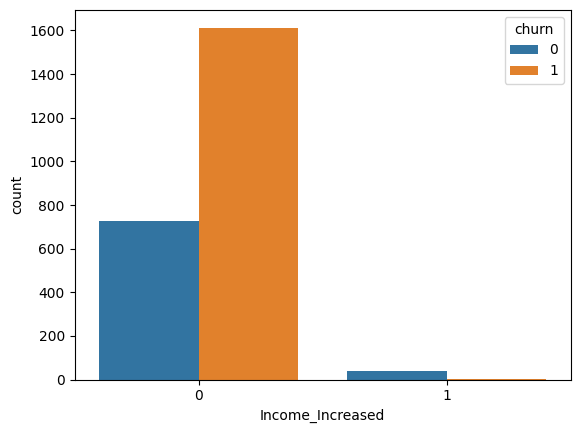

In [249]:
sns.countplot(x=df['Income_Increased'],hue=df['churn'])

Income increases are rare overall, but almost no one who left received one.

data preparation of model building

In [250]:
df

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth
Driver_Id,,,,,,,,,,,,,,,,
1,28.0,0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,0,0,1,2018,12
2,31.0,0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0,0,0,2020,11
4,43.0,0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0,0,1,2019,12
5,29.0,0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0,0,1,2019,1
6,31.0,1,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,1,0,0,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,34.0,0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,1,0,0,2015,10
2785,34.0,1,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0,0,1,2020,8
2786,45.0,0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,0,0,1,2018,7


drop Driverid as no information in it only unique number,dateofjoining  as we drive other feature from it such as dateofjoiningyear and month,lastworking day as most of it is nan and it as somehow target variable.

In [251]:
df.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Dateofjoining', 'LastWorkingDate',
       'Total Business Value', 'Quarterly Rating',
       'Quarterly_Rating_Increased', 'Income_Increased', 'churn',
       'Dateofjoiningyear', 'Dateofjoiningmonth'],
      dtype='object')

In [252]:
df.reset_index(drop=True, inplace=True)

In [253]:
df

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth
0,28.0,0,C23,2.0,57387.0,1.0,1.0,2018-12-24,2019-03-11,1715580.0,2.0,0,0,1,2018,12
1,31.0,0,C7,2.0,67016.0,2.0,2.0,2020-11-06,NaT,0.0,1.0,0,0,0,2020,11
2,43.0,0,C13,2.0,65603.0,2.0,2.0,2019-12-07,2020-04-27,350000.0,1.0,0,0,1,2019,12
3,29.0,0,C9,0.0,46368.0,1.0,1.0,2019-01-09,2019-03-07,120360.0,1.0,0,0,1,2019,1
4,31.0,1,C11,1.0,78728.0,3.0,3.0,2020-07-31,NaT,1265000.0,2.0,1,0,0,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0,C24,0.0,82815.0,2.0,3.0,2015-10-15,NaT,21748820.0,4.0,1,0,0,2015,10
2377,34.0,1,C9,0.0,12105.0,1.0,1.0,2020-08-28,2020-10-28,0.0,1.0,0,0,1,2020,8
2378,45.0,0,C19,0.0,35370.0,2.0,2.0,2018-07-31,2019-09-22,2815090.0,1.0,0,0,1,2018,7
2379,28.0,1,C20,2.0,69498.0,1.0,1.0,2018-07-21,2019-06-20,977830.0,1.0,0,0,1,2018,7


In [254]:
df.drop(columns=['Dateofjoining','LastWorkingDate'],inplace=True)

In [255]:
df

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth
0,28.0,0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,1,2018,12
1,31.0,0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0,2020,11
2,43.0,0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,1,2019,12
3,29.0,0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,0,1,2019,1
4,31.0,1,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,0,0,2015,10
2377,34.0,1,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,0,1,2020,8
2378,45.0,0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,0,1,2018,7
2379,28.0,1,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,0,1,2018,7


In [256]:
df.dtypes

,0
Age,float64
Gender,int64
City,object
Education_Level,float64
Income,float64
Joining Designation,float64
Grade,float64
Total Business Value,float64
Quarterly Rating,float64
Quarterly_Rating_Increased,int64


In [257]:
df

,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth
0,28.0,0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,1,2018,12
1,31.0,0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0,2020,11
2,43.0,0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,1,2019,12
3,29.0,0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,0,1,2019,1
4,31.0,1,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,0,0,2015,10
2377,34.0,1,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,0,1,2020,8
2378,45.0,0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,0,1,2018,7
2379,28.0,1,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,0,1,2018,7


In [258]:
df.to_csv('pre_encoded_data.csv', index=False)

In [259]:
df['City'].nunique()

29

there are about 29 unique city so we will do target encoding.

In [260]:
city_target_mean = df.groupby('City')['churn'].mean()
df['city_encoded']=df['City'].map(city_target_mean)

In [261]:
df.drop(columns=['City'],inplace=True)

In [262]:
df

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Income_Increased,churn,Dateofjoiningyear,Dateofjoiningmonth,city_encoded
0,28.0,0,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,0,1,2018,12,0.770270
1,31.0,0,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0,2020,11,0.684211
2,43.0,0,2.0,65603.0,2.0,2.0,350000.0,1.0,0,0,1,2019,12,0.816901
3,29.0,0,0.0,46368.0,1.0,1.0,120360.0,1.0,0,0,1,2019,1,0.706667
4,31.0,1,1.0,78728.0,3.0,3.0,1265000.0,2.0,1,0,0,2020,7,0.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0,0.0,82815.0,2.0,3.0,21748820.0,4.0,1,0,0,2015,10,0.698630
2377,34.0,1,0.0,12105.0,1.0,1.0,0.0,1.0,0,0,1,2020,8,0.706667
2378,45.0,0,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,0,1,2018,7,0.569444
2379,28.0,1,2.0,69498.0,1.0,1.0,977830.0,1.0,0,0,1,2018,7,0.730263


In [263]:
df['city_encoded'].nunique()

29

In [264]:
df.to_csv('encoded_data.csv', index=False)

In [265]:
y=df['churn']

In [266]:
x=df.drop(columns=['churn'])

In [267]:
x.shape,y.shape

((2381, 13), (2381,))

In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.80,random_state=42)

In [269]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1904, 13), (477, 13), (1904,), (477,))

we are not going to use minmaxscaler or standarscaler because Decision Trees(other improved version of it or other algo using its principle) are not affected by different scale value

In [270]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [271]:
params = {
    'n_estimators' : [50,100,150],
    'max_depth' : [2,4,6],
    'criterion' : ['gini', 'entropy'],

    }

In [272]:


grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'f1',
                    cv = 3,
                    n_jobs=-1
                    )

In [273]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [274]:
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 150}
Best score:  0.9247110227183458


let's do some grid search near the maxdepth 6 and number of tree 100.

In [275]:
params = {
    'n_estimators' : [90,100,110,120],
    'max_depth' : [5,6,7,8],
    'criterion' : ['entropy'],

    }

In [276]:

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'f1',
                    cv = 3,
                    n_jobs=-1
                    )

In [277]:
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 6, 7, 8],
                         'n_estimators': [90, 100, 110, 120]},
             scoring='f1')

In [278]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 90}
0.9298527379580372


there is not significant change in the score so we will use max_depth=4,n_estimator=100 as it will decrease the compute cost of the model.

In [279]:
model=RandomForestClassifier(criterion='entropy',max_depth=4,n_estimators=100)

In [280]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [281]:
y_pred=model.predict(x_test)

In [282]:
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.62      0.72       150
           1       0.85      0.96      0.90       327

    accuracy                           0.85       477
   macro avg       0.86      0.79      0.81       477
weighted avg       0.85      0.85      0.84       477

[[ 93  57]
 [ 14 313]]


In [283]:
y_train.value_counts()

,count
churn,
1,1289
0,615


clearly o class is less then 1 so we will balance this using smote technique.

In [284]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 7)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)

In [285]:
y_train_smote.value_counts()

,count
churn,
0,1289
1,1289


In [286]:
model.fit(x_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [287]:
y_pred=model.predict(x_test)

In [288]:
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       150
           1       0.90      0.91      0.91       327

    accuracy                           0.87       477
   macro avg       0.85      0.84      0.85       477
weighted avg       0.87      0.87      0.87       477

[[116  34]
 [ 28 299]]


model performance increased after doing this

True Negatives (TN)	117	Correctly predicted not churn
False Positives (FP)	33	Predicted churn, but actually not churn
False Negatives (FN)	28	Predicted not churn, but actually churned
True Positives (TP)	299	Correctly predicted churn

Strong churn detection:

Your model correctly identifies 91% of churners (high recall).

Only 28 churners missed (FN), which is low.

Moderate false positives:

33 employees were predicted to churn but actually didn’t (FP).

May lead to unnecessary retention efforts for some.

 Good overall balance:

Precision, recall, and F1-scores are balanced and strong across both classes.

Accuracy of 87% is solid.

let's use t xgboost instead of gbdt as it is better version of the gbdt only.

In [289]:
xgmodel = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [290]:
params = {
    'n_estimators' : [90,100,110,120,130],
    'max_depth' : [5,6,7,8,10,12],
    "learning_rate": [0.1, 0.2, 0.3],

    }

In [291]:
grid = GridSearchCV(
    estimator=xgmodel,
    param_grid=params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [292]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [5, 6, 7, 8, 10, 12],
                         'n_estimators': [90, 100, 110, 120, 130]},
             scoring='f1', verbose=1)

In [293]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 90}
0.9286557160388936


In [294]:
params = {
    'n_estimators' : [60,70,80,85,90],
    'max_depth' : [3,4,5,6,7]

    }

In [295]:
grid = GridSearchCV(
    estimator=xgmodel,
    param_grid=params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [296]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [60, 70, 80, 85, 90]},
             scoring='f1', verbose=1)

In [297]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 3, 'n_estimators': 70}
0.9312614393228142


In [298]:
params = {
    'n_estimators' : [65,68,70,72,75],
    'max_depth' : [2,3,4,5]

    }

In [299]:
grid = GridSearchCV(
    estimator=xgmodel,
    param_grid=params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [300]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [65, 68, 70, 72, 75]},
             scoring='f1', verbose=1)

In [301]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 2, 'n_estimators': 72}
0.9341691686932782


In [302]:
grid.fit(x_train_smote,y_train_smote)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [65, 68, 70, 72, 75]},
             scoring='f1', verbose=1)

In [303]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 3, 'n_estimators': 75}
0.9153628010548442


In [304]:
params = {
    'n_estimators' : [60,70,80,85,90],
    'max_depth' : [3,4,5,6,7]

    }
grid = GridSearchCV(
    estimator=xgmodel,
    param_grid=params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(x_train_smote,y_train_smote)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [60, 70, 80, 85, 90]},
             scoring='f1', verbose=1)

In [305]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 3, 'n_estimators': 70}
0.9137598254262341


In [306]:
params = {
    'n_estimators' : [65,68,70,72,74,76],
    'max_depth' : [2,3,4,5,6,7]

    }
grid = GridSearchCV(
    estimator=xgmodel,
    param_grid=params,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid.fit(x_train_smote,y_train_smote)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [65, 68, 70, 72, 74, 76]},
             scoring='f1', verbose=1)

In [307]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 3, 'n_estimators': 76}
0.9155108219400608


let's use n_estimators=70 and max_depth=3

In [308]:
xgmodel=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,max_depth=3,n_estimators=70)

In [309]:
xgmodel.fit(x_train_smote,y_train_smote)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=70,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [310]:
import pickle


with open("xgmodel.pkl", "wb") as file:
    pickle.dump(xgmodel, file)


In [311]:
y_pred=xgmodel.predict(x_test)

In [312]:
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       150
           1       0.92      0.94      0.93       327

    accuracy                           0.90       477
   macro avg       0.89      0.88      0.88       477
weighted avg       0.90      0.90      0.90       477

[[123  27]
 [ 21 306]]


Excellent at predicting churn (class 1):

94% of churn cases correctly identified (high recall).

92% of predicted churns were correct (high precision).

Only 21 actual churners were missed.

 Slight overprediction of churn:

27 employees predicted to churn didn’t actually churn (false positives).

May result in unnecessary retention actions.

Strong overall performance:

Accuracy of 90%, macro F1-score of 0.88, and weighted F1-score of 0.90.

Model is well-balanced for both classes, even though churn (class 1) is usually more critical.

The model performs very well, especially in identifying churners — which is typically the main goal in churn prediction tasks. Minor trade-offs in false positives are acceptable in exchange for high recall on churn.



let's use stacking ensemble to check if the model performance is increasing or not.

In [313]:
estimators = [
    ('rd', RandomForestClassifier(criterion='entropy',max_depth=4,n_estimators=100)),
    ('xgb', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,max_depth=3,n_estimators=70))
]

In [314]:
from sklearn.svm import SVC

In [315]:
final_estimator = SVC()

In [316]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=3)


In [317]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:59:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


StackingClassifier(cv=3,
                   estimators=[('rd',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=4)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              gro...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=70, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=SVC())

In [318]:
y_pred=clf.predict(x_test)

In [319]:
confusion_matrix(y_test,y_pred)

array([[124,  26],
       [ 19, 308]])

In [320]:
print(classification_report(y_test,y_pred))
cm=confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       150
           1       0.92      0.94      0.93       327

    accuracy                           0.91       477
   macro avg       0.89      0.88      0.89       477
weighted avg       0.90      0.91      0.91       477

[[124  26]
 [ 19 308]]


True Negatives (TN)	123	Correctly predicted not churn
False Positives (FP)	27	Predicted churn, actually not churn
False Negatives (FN)	20	Predicted not churn, actually churned
True Positives (TP)	307	Correctly predicted churn
 Excellent churn detection (class 1):

High recall (0.94) means the model catches most employees who actually leave.

Only 20 actual churners were missed — very good for HR risk management.

Some false churn alarms:

27 people were wrongly predicted to leave (false positives).

Slightly higher cost if intervention actions are resource-intensive.

 Balanced performance:

Accuracy and F1-scores are consistently strong across both classes.

Very good real-world applicability for churn predictio
This is a high-quality churn prediction model — well-balanced and particularly strong at identifying employees likely to leave.

let use this to get the feature importance.

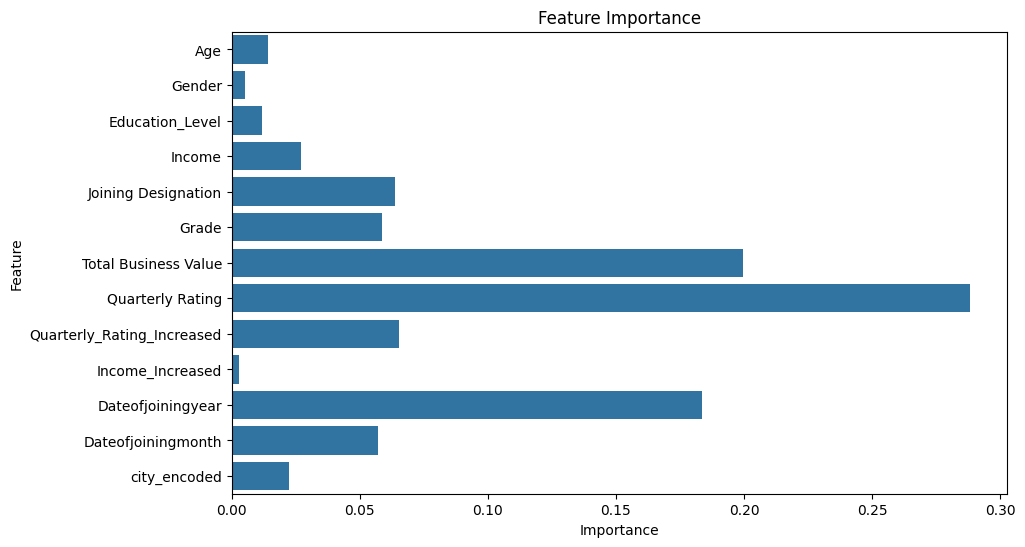

In [321]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=x.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Top Influential Features
Quarterly Rating

Most impactful feature (importance ~0.33).

Indicates strong correlation between performance ratings and churn likelihood.

Date of Joining Year

High importance suggests that the year of joining influences churn — possibly due to tenure or company policy changes over time.

Total Business Value

Suggests drivers contributing more business tend to behave differently in terms of churn.



Moderately Important
Grade

Joining Designation

Quarterly Rating Increased

Date of Joining Month

These features likely reflect career progress and seasonal/joining factors.



Low Importance Features
Gender

Income Increased

Age

Education Level

City Encoded

These contribute less to the model, indicating that demographics or location may not significantly impact churn in this context.




Key Insights
1. Churn Rate
68% of drivers have churned; 32% are still with the company.

Indicates high attrition, which can hurt business continuity and customer service.

2. Top Predictive Features Identified
Quarterly Rating Increased: Strong correlation with churn.

94.9% of churned drivers saw no rating increase.

Income:

Non-churned average: ₹67,662

Churned average: ₹55,391

Total Business Value:

Churned drivers: contributed far less business (~₹2.2M)

Non-churned: ~₹9.6M average

Grades 1 & 2: Represent ~74% of churners.

Joining Designation:

Designation 1: 47% churned

Higher designations show better retention.

3. City-Based Patterns
Cities with highest churn:

C13 (81.7%), C17 (77.5%), C23 (77%)

Cities with better retention:

C29 (53%), C19 (57%)

4. Joining Time Trends
Year:

Those who joined in 2020 had better retention (57%).

2018 and 2019 joiners had highest churn.

Month:

Drivers who joined in May, June, July had highest churn.

Retention is better among November–December joiners.

5. Demographics
Gender: No strong difference in churn between male and female.

Age: Churn spans across all ages fairly evenly.

Education Level: Not a significant churn driver (66–69% churn rate across all levels).

6. Income Increase
Almost none of the churned drivers had any income increase.

Signals lack of progression may contribute to leaving.





Recommendations
Business Actions
Retention Strategy for Early-Stage Drivers

Focus on drivers with Grade 1 & 2, and low designations.

Offer development or progression programs.

City-Specific Interventions

Investigate issues in high-churn cities (C13, C17, C23).